![](https://lever-client-logos.s3.amazonaws.com/1d94f8aa-9158-4e8f-8916-2e98f32b56c1-1563979173516.png)

## Improve Productivity With Spendesk 🚀

[Spendesk](https://www.spendesk.com/) is a unicorn whose goal is to simplify companies expenses by providing an all-in-one spending platform that finance teams will use to monitor, authorize and track payments. 

Feel free to check out their presentation if you want to learn more about their product: 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('wtj4t1jCELc', width="700px", height="400px")

One thing that Spendesk really would like to prove is that their platform save at least 26 days of work to their customers. This would be a great for sales to be able to showcase a number saying something like: 

> *Our customers take 26 days less on average to produce financial statements when using Spendesk* 

That is why they conducted a survey where they asked user how long it would take for their customer to produce an income statement before using Spendesk and after.

Let's tackle this exercise step by step

## Step 1 - Import libraries 

Let's import the following libraries for our project: 

* `numpy as np`
* `pandas as pd`
* `matplotlib.pyplot as plt`
* `seaborn as sns`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

## Step 2 - Import Dataset 

Now you need to import your dataset. Download `spendesk_survey.csv` and load it in your notebook using `pandas`

In [2]:
df = pd.read_csv("spendesk_survey.csv")
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after
0,11,75
1,13,72
2,38,15
3,28,34
4,39,17


## Step 3 - EDA 

For our EDA, we will simply calculate the `mean` for both our columns and then try to visualize it using `.plot()` function in `pandas`

<AxesSubplot:>

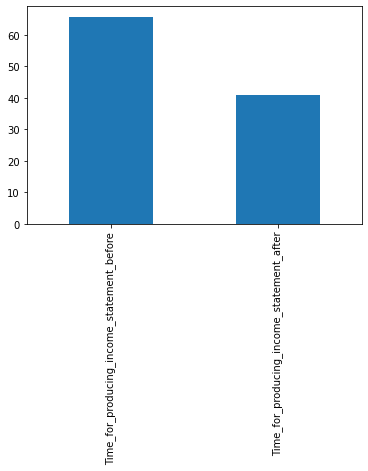

In [3]:
df.mean().plot(kind="bar")

Now try to calculate the average productivity boost after using Spendesk. 

👋 Here is the formula: 

$$variation = \frac{Average_{t-1} - Average_{t-2}}{Average_{t-1}}$$

In [7]:
# Alternative #1
sample_avg_boost = (df.mean()["Time_for_producing_income_statement_before"] - df.mean()["Time_for_producing_income_statement_after"])/df.mean()["Time_for_producing_income_statement_before"]
print("Average boost from our sample: {}% ".format(np.round(sample_avg_boost*100)))

Average boost from our sample: 38.0% 


In [8]:
# Alternative #2
sample_avg_boost = (df.mean()[0] - df.mean()[1])/df.mean()[0]
print("Average boost from our sample: {}% ".format(np.round(sample_avg_boost*100)))

Average boost from our sample: 38.0% 


Finally, create a new column within your dataset that will simply the difference between `Time_for_producing_income_statement_before` and `Time_for_producing_income_statement_after`. Call the column `time_difference`. 

In [9]:
# Using iloc:
# df["time_difference"] = df.iloc[:, 0] - df.iloc[:, 1]
# Using columns title:
df["time_difference"] = df["Time_for_producing_income_statement_before"] - df["Time_for_producing_income_statement_after"]
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after,time_difference
0,11,75,-64
1,13,72,-59
2,38,15,23
3,28,34,-6
4,39,17,22


## Step 4 - Define hypothesises

Now what we need to do is to define our $H_0$ and $H_1$: 

* $H_0$ - Average productivity boost => 26 days 
* $H_1$ - Average productivity boost < 26 days

## Step 5 - Calculate Z-score 

Let's calculate our $Z-score$ so that we will be able to run our test. To do so, you will need to:

* Calculate the average `time_difference`
* Calculate the std of `time_difference`
* Find sample size `n`
* Apply $Z = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$

In [10]:
# Calculate Z-score 
sample_average = df.mean()["time_difference"]
sample_std = df.std()["time_difference"]
mu = 26
n = len(df)

z_score = (sample_average - mu)/(sample_std/np.sqrt(n))
print("Z-score equal: {}".format(z_score))

Z-score equal: -1.3212112178009863


## Step 6 - Set $\alpha$ 

Now we need to set a confidence level $\alpha$, after talking with Spendesk's marketing team, they told us that `10%` seemed enough. 

In [11]:
# Define alpha 
alpha = 0.10

## Step 7 - Compare p-value to $\alpha$ 

Finally, we need to get our `p-value`. Instead of looking at tools like [Statdistributions.com](https://statdistributions.com), you can use this function from `statsmodels` library: 

* [`ztest`](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [12]:
from statsmodels.stats.weightstats import ztest
z_score, p_value = ztest(df["time_difference"], alternative='smaller', value=26)

print("Z_score value is: {}".format(z_score))
print("p-value is: {}".format(p_value))

if p_value < alpha:
    print("We can reject the Null Hypothesis")
else:
    print("We can't reject the Null hypothesis")

Z_score value is: -1.3212112178009856
p-value is: 0.0932154734772751
We can reject the Null Hypothesis


## Step 8 (Optional) - Visualize probability

Finally, one cool thing could be to visualize your Z-test! One thing that we could use is `matplotlib.pyplot` library with `seaborn`. Check out this code and try to understand the results. 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


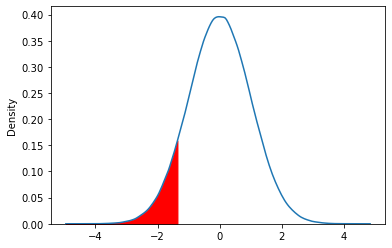

In [13]:
### Visualize area under curve
import seaborn as sns 

# Displot from seaborn gives us a distribution from what is inside the parenthesis
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] < z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()

And that's it! You're done. Now the above code is quite hard a little beyond the scope of the course. But it is still nice to see what you can accomplish with Python and a little bit of training 🥰